# Question:
### Find whether factors like lexical diversity and positive sensitive analysis has any effect on favorite count of a tweet?

Gather the information from the 3 different users i have taken the users of a sports person, a politician and a movie actor.

In [3]:
from twitter_keys import consumer_key, consumer_secret, access_token, access_secret
import tweepy
import pickle
from collections import Counter
import array
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
import nltk


In [5]:
nltk.download('vader_lexicon')
  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\S531438\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [8]:
username='imVkohli'
username1='KTRTRS'
username2='urstrulyMahesh'

In [9]:
# Pickle the kohli(user01) data from the twitter

user1 = api.user_timeline(username)    
with open('kohli.pkl', 'wb') as f:
    pickle.dump(user1, f)
with open('kohli.pkl', 'rb') as f:
    user1 = pickle.load(f)

In [10]:
# Pickle the Ktr(user02) data from the twitter

user2 = api.user_timeline(username1)    
with open('KTR.pkl', 'wb') as f:
    pickle.dump(user2, f)
with open('KTR.pkl', 'rb') as f:
    user2 = pickle.load(f)

In [11]:
# Pickle the mahesh(user03) data from the twitter

user3 = api.user_timeline(username2)    
with open('Mahesh.pkl', 'wb') as f:
    pickle.dump(user3, f)
with open('Mahesh.pkl', 'rb') as f:
    user3 = pickle.load(f)

In [12]:
#sort a list
def Sort(sub_li): 
    l = len(sub_li) 
    for i in range(0, l): 
        for j in range(0, l-i-1): 
            if (sub_li[j][1] > sub_li[j + 1][1]): 
                tempo = sub_li[j] 
                sub_li[j]= sub_li[j + 1] 
                sub_li[j + 1]= tempo 
    return sub_li 

## Gather and display all the data of User1

In [32]:
#Step1: Find the favorite count of each tweet of user data and store it in a list which was already created above

user_one_fav_count = []
for ktweet in user1:
    user_one_fav_count.append(ktweet.favorite_count)

user_one_sa_pos = []
user_one_sa_neu = []
user_one_sa_neg = []
user_one_sa_com = []
user_one_div = []

# Find lexical diversity of each tweet and store it in a list

def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

for ktweet in user1:
    user_one_div.append(lexical_diversity(ktweet.text.split()))

#Step2: perform sentiment analysis of each tweet

# Store positive of sentiment analysis in list

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for ktweet in user1:
    user_one_sa_pos.append(analyzer.polarity_scores(ktweet.text)['pos'])
    user_one_sa_neg.append(analyzer.polarity_scores(ktweet.text)['neg'])
    user_one_sa_neu.append(analyzer.polarity_scores(ktweet.text)['neu'])
    user_one_sa_com.append(analyzer.polarity_scores(ktweet.text)['compound'])
    
# Import the required modules
import texttable as tt
tab = tt.Texttable()
# Store the headings in a list 

headings = ['Sno','Positive','Negative','Neutral','Fav_count','Lexicaldiversity']
# headings of the table
tab.header(headings)

names = ['Tweet 1', 'Tweet 2', 'Tweet 3','Tweet 4', 'Tweet 5', 'Tweet 6','Tweet 7', 'Tweet 8', 'Tweet 9','Tweet 10', 'Tweet 11', 'Tweet 12','Tweet 13', 'Tweet 14', 'Tweet 15','Tweet 16', 'Tweet 17','Tweet 18', 'Tweet 19', 'Tweet 20']

pos = user_one_sa_pos
neg = user_one_sa_neg
neu = user_one_sa_neu
fav = user_one_fav_count
div = user_one_div
tab.title = ''

# Populate the data in the respective fields
for row in zip(names,pos,neg,neu,fav,div):
    tab.add_row(row)
    
# Draw the table & display it
s = tab.draw()
print('User 1 Favourite count, lexical diverssity, sentiment analysis on tweets')
print (s)#Step one: Find the favorite count of each tweet of user data and store it in a list
user_one_fav_count = []
for ktweet in user1:
    user_one_fav_count.append(ktweet.favorite_count)

user_one_sa_pos = []
user_one_sa_neu = []
user_one_sa_neg = []
user_one_sa_com = []
user_one_div = []
# Find lexical diversity of each tweet and store it in a list
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

for ktweet in user1:
    user_one_div.append(lexical_diversity(ktweet.text.split()))

#Step two: perform sentiment analysis of each tweet
# Store positive of sentiment analysis in list
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for ktweet in user1:
    user_one_sa_pos.append(analyzer.polarity_scores(ktweet.text)['pos'])
    user_one_sa_neg.append(analyzer.polarity_scores(ktweet.text)['neg'])
    user_one_sa_neu.append(analyzer.polarity_scores(ktweet.text)['neu'])
    user_one_sa_com.append(analyzer.polarity_scores(ktweet.text)['compound'])
    
# Import the required modules
import texttable as tt
tab = tt.Texttable()
# Store the headings in a list 
headings = ['Sno','Positive','Negative','Neutral','Fav_count','Lexicaldiversity']
# Set the header of the table
tab.header(headings)
names = ['Tweet 1', 'Tweet 2', 'Tweet 3','Tweet 4', 'Tweet 5', 'Tweet 6','Tweet 7', 'Tweet 8', 'Tweet 9','Tweet 10', 'Tweet 11', 'Tweet 12','Tweet 13', 'Tweet 14', 'Tweet 15','Tweet 16', 'Tweet 17','Tweet 18', 'Tweet 19', 'Tweet 20']

pos = user_one_sa_pos
neg = user_one_sa_neg
neu = user_one_sa_neu
fav = user_one_fav_count
div = user_one_div
tab.title = ''
# Populate the data in the respective fields
for row in zip(names,pos,neg,neu,fav,div):
    tab.add_row(row)
# Draw the table & display it
s = tab.draw()
print('kohli Favourite count, lexical diverssity, sentiment analysis on tweets')
print (s)

User 1 Favourite count, lexical diverssity, sentiment analysis on tweets
+----------+----------+----------+---------+-----------+------------------+
|   Sno    | Positive | Negative | Neutral | Fav_count | Lexicaldiversity |
+==========+==========+==========+=========+===========+==================+
| Tweet 1  | 0        | 0        | 1       | 154956    | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 2  | 0.447    | 0        | 0.553   | 146145    | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 3  | 0.157    | 0        | 0.843   | 224929    | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 4  | 0        | 0        | 1       | 138557    | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 5  | 0.272    | 0        | 0.728   | 41885     | 0.952            |
+----------+---

In [33]:
#Step1: Find the favorite count of each tweet of user data and store it in a list which was already created above
user_two_fav_count = []
for ktweet in user2:
    user_two_fav_count.append(ktweet.favorite_count)

user_two_sa_pos = []
user_two_sa_neu = []
user_two_sa_neg = []
user_two_sa_com = []
user_two_div = []

# Find lexical diversity of each tweet and store it in a list

def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

for ktweet in user2:
    user_two_div.append(lexical_diversity(ktweet.text.split()))

#Step2: perform sentiment analysis of each tweet and Store positive of sentiment analysis in list

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for ktweet in user2:
    user_two_sa_pos.append(analyzer.polarity_scores(ktweet.text)['pos'])
    user_two_sa_neg.append(analyzer.polarity_scores(ktweet.text)['neg'])
    user_two_sa_neu.append(analyzer.polarity_scores(ktweet.text)['neu'])
    user_two_sa_com.append(analyzer.polarity_scores(ktweet.text)['compound'])
    
# Import the required modules
import texttable as tt
tab = tt.Texttable()


# Store the headings in a list 
headings = ['Names','Positive','Negative','Neutral','Fav_count','Lexicaldiversity']

# Set the header of the table
tab.header(headings)
names = ['Tweet 1', 'Tweet 2', 'Tweet 3','Tweet 4', 'Tweet 5', 'Tweet 6','Tweet 7', 'Tweet 8', 'Tweet 9','Tweet 10', 'Tweet 11', 'Tweet 12','Tweet 13', 'Tweet 14', 'Tweet 15','Tweet 16', 'Tweet 17','Tweet 18', 'Tweet 19', 'Tweet 20']

pos = user_two_sa_pos
neg = user_two_sa_neg
neu = user_two_sa_neu
com = user_two_sa_com
fav = user_two_fav_count
div = user_two_div
tab.title = ''
# Populate the data in the respective fields
for row in zip(names,pos,neg,neu,fav,div):
    tab.add_row(row)
# Draw the table and display
s = tab.draw()
print('KTR Favourite count, sentiment analysis and lexical diversity on tweets')

print (s)

KTR Favourite count, sentiment analysis and lexical diversity on tweets
+----------+----------+----------+---------+-----------+------------------+
|  Names   | Positive | Negative | Neutral | Fav_count | Lexicaldiversity |
+==========+==========+==========+=========+===========+==================+
| Tweet 1  | 0        | 0        | 1       | 0         | 0.933            |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 2  | 0        | 0        | 1       | 0         | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 3  | 0.264    | 0        | 0.736   | 1697      | 0.952            |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 4  | 0.252    | 0        | 0.748   | 4895      | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 5  | 0.171    | 0        | 0.829   | 1432      | 0.947            |
+----------+----

In [30]:
#Step one: Find the favorite count of each tweet of user data and store it in a list
user_three_fav_count = []
for ktweet in user3:
    user_three_fav_count.append(ktweet.favorite_count)

user_three_sa_pos = []
user_three_sa_neu = []
user_three_sa_neg = []
user_three_sa_com = []
user_three_div = []

# Find lexical diversity of each tweet and store it in a list

def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

for ktweet in user3:
    user_three_div.append(lexical_diversity(ktweet.text.split()))
    
#Step two: perform sentiment analysis of each tweet
# Store positive of sentiment analysis in list
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for ktweet in user3:
    user_three_sa_pos.append(analyzer.polarity_scores(ktweet.text)['pos'])
    user_three_sa_neg.append(analyzer.polarity_scores(ktweet.text)['neg'])
    user_three_sa_neu.append(analyzer.polarity_scores(ktweet.text)['neu'])
    user_three_sa_com.append(analyzer.polarity_scores(ktweet.text)['compound'])
# Import the required modules
import texttable as tt
tab = tt.Texttable()
# Store the headings in a list 
headings = ['Names','Positive','Negative','Neutral','Fav_count','Lexicaldiversity']
# Set the header of the table
tab.header(headings)
names = ['Tweet 1', 'Tweet 2', 'Tweet 3','Tweet 4', 'Tweet 5', 'Tweet 6','Tweet 7', 'Tweet 8', 'Tweet 9','Tweet 10', 'Tweet 11', 'Tweet 12','Tweet 13', 'Tweet 14', 'Tweet 15','Tweet 16', 'Tweet 17','Tweet 18', 'Tweet 19', 'Tweet 20']

pos = user_three_sa_pos
neg = user_three_sa_neg
neu = user_three_sa_neu
com = user_three_sa_com
fav = user_three_fav_count
div = user_three_div
tab.title = ''
# Populate the data in the respective fields
for row in zip(names,pos,neg,neu,fav,div):
    tab.add_row(row)
# Draw the table & display it
s = tab.draw()
print('mahesh Favourite count and sentiment analysis on tweets')
print (s)

mahesh Favourite count and sentiment analysis on tweets
+----------+----------+----------+---------+-----------+------------------+
|  Names   | Positive | Negative | Neutral | Fav_count | Lexicaldiversity |
+==========+==========+==========+=========+===========+==================+
| Tweet 1  | 0.394    | 0        | 0.606   | 34825     | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 2  | 0.230    | 0        | 0.770   | 32078     | 0.889            |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 3  | 0.479    | 0        | 0.521   | 44209     | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 4  | 0.600    | 0        | 0.400   | 50919     | 1                |
+----------+----------+----------+---------+-----------+------------------+
| Tweet 5  | 0        | 0        | 1       | 38369     | 1                |
+----------+----------+---------

### Find the Relationship between  positive sensitive analysis and Favorite count of the 3 users.
Gathered tweets and its data from three different users and Visualized the data positive sensitive analysis vs favorite count of tweets using scatter graph and compare the graphs of the three users.


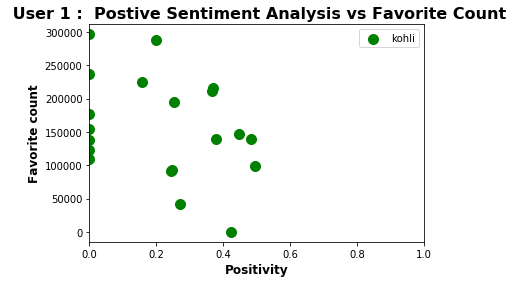

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
# user1 code to  graph of positive sensitive analysis vs favorite count
import matplotlib.pyplot as plt

y = user_one_fav_count
x = user_one_sa_pos

plt.scatter(x,y,label='kohli', color='G', s=100, marker="o")
plt.xlim(0,1)
plt.xlabel('Positivity', fontsize=12,fontweight='bold')
plt.ylabel('Favorite count', fontsize=12,fontweight='bold')
plt.title(' User 1 :  Postive Sentiment Analysis vs Favorite Count',fontsize=16,fontweight='bold')
plt.legend()
plt.show()


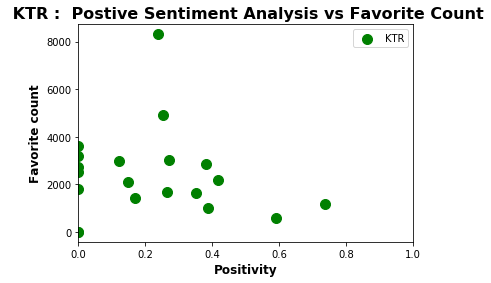

In [38]:
# user 2 code to  graph of positive sensitive analysis vs favorite count
import matplotlib.pyplot as plt

y = user_two_fav_count
x = user_two_sa_pos

plt.scatter(x,y,label='KTR', color='g', s=100, marker="o")
plt.xlim(0,1)
plt.xlabel('Positivity', fontsize=12,fontweight='bold')
plt.ylabel('Favorite count', fontsize=12,fontweight='bold')
plt.title(' KTR :  Postive Sentiment Analysis vs Favorite Count',fontsize=16,fontweight='bold')
plt.legend()
plt.show()

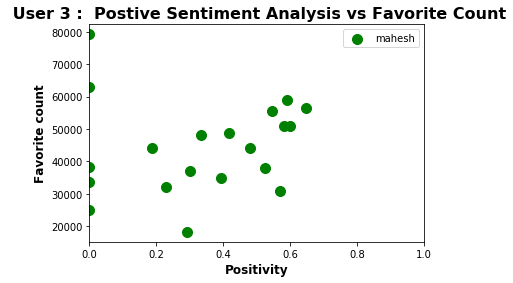

In [37]:

# user 3 code to  graph of positive sensitive analysis vs favorite count
import matplotlib.pyplot as plt

y = user_three_fav_count
x = user_three_sa_pos

plt.scatter(x,y,label='mahesh', color='g', s=100, marker="o")
plt.xlim(0,1)
plt.xlabel('Positivity', fontsize=12,fontweight='bold')
plt.ylabel('Favorite count', fontsize=12,fontweight='bold')
plt.title(' User 3 :  Postive Sentiment Analysis vs Favorite Count',fontsize=16,fontweight='bold')
plt.legend()
plt.show()

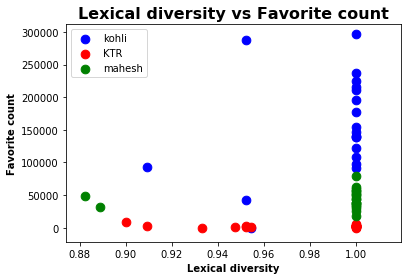

In [39]:
# import the required modules
import matplotlib.pyplot as plt

y1 = user_one_fav_count
x1 = user_one_div
y2 = user_two_fav_count
x2 = user_two_div
y3 = user_three_fav_count
x3 = user_three_div
plt.scatter(x1,y1,label='kohli', color='b', s=75, marker="o")
plt.scatter(x2,y2,label='KTR', color='R', s=75, marker="o")
plt.scatter(x3,y3,label='mahesh', color='g', s=75, marker="o")
# title and label the graph
plt.legend()
plt.xlabel('Lexical diversity',fontweight='bold')
plt.ylabel('Favorite count',fontweight='bold')

plt.title('Lexical diversity vs Favorite count',fontsize='16',fontweight='bold')

plt.show()